In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
columns =  list(df.columns)
columns


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

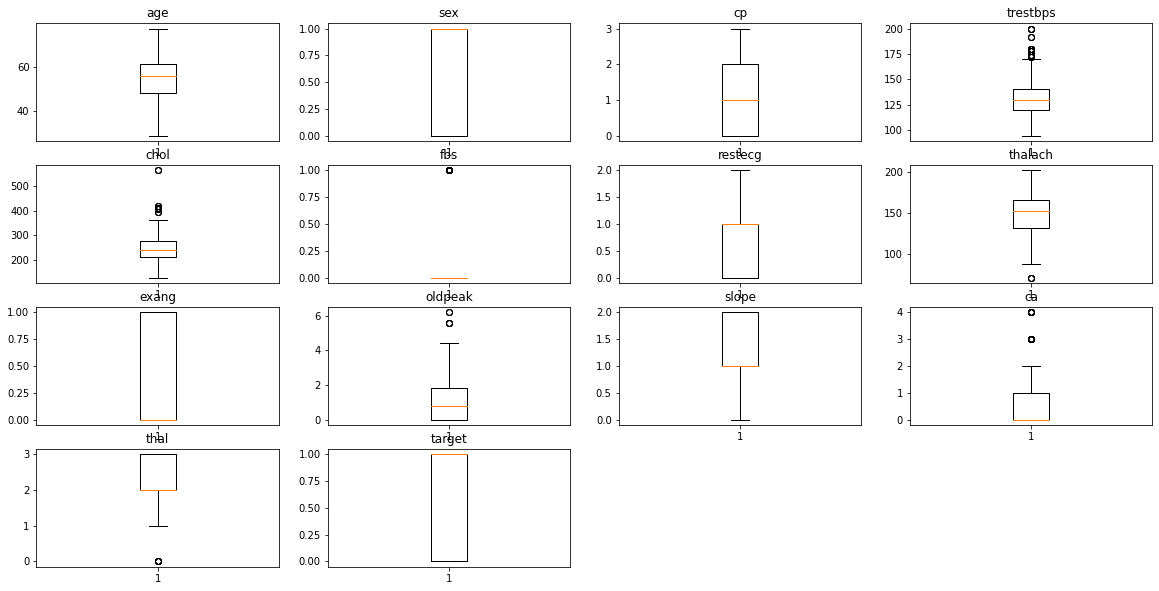

In [ ]:
plt.figure(figsize = (20, 10))

for i in range(1, len(columns)+1):

  plt.subplot(4, 4, i)

  plt.boxplot(df[columns[i-1]])

  plt.title(columns[i-1])


In [ ]:
numerical1 = ["trestbps", "chol"]
for i in range(1, len(numerical1)+1):
    
    iqr = df[numerical1[i-1]].quantile(0.75) - df[numerical1[i-1]].quantile(0.25)
    min_val = df[numerical1[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical1[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] > max_val, max_val, df[numerical1[i-1]])
    df[numerical1[i-1]] = np.where(df[numerical1[i-1]] < min_val, min_val, df[numerical1[i-1]])

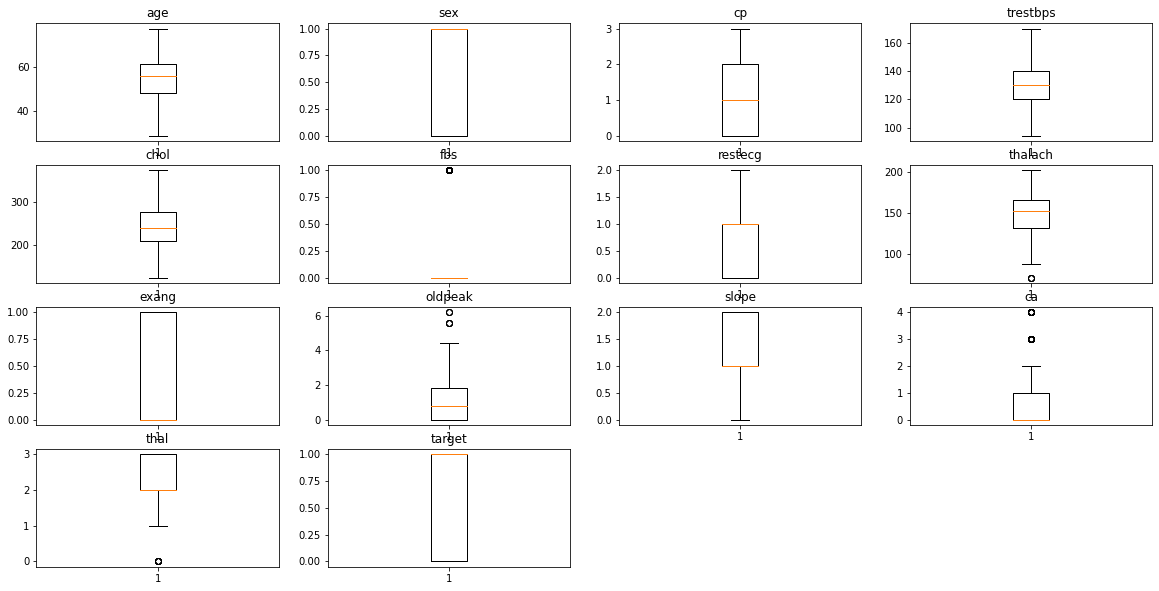

In [ ]:
plt.figure(figsize = (20, 10))

for i in range(1, len(columns)+1):

  plt.subplot(4, 4, i)

  plt.boxplot(df[columns[i-1]])

  plt.title(columns[i-1])


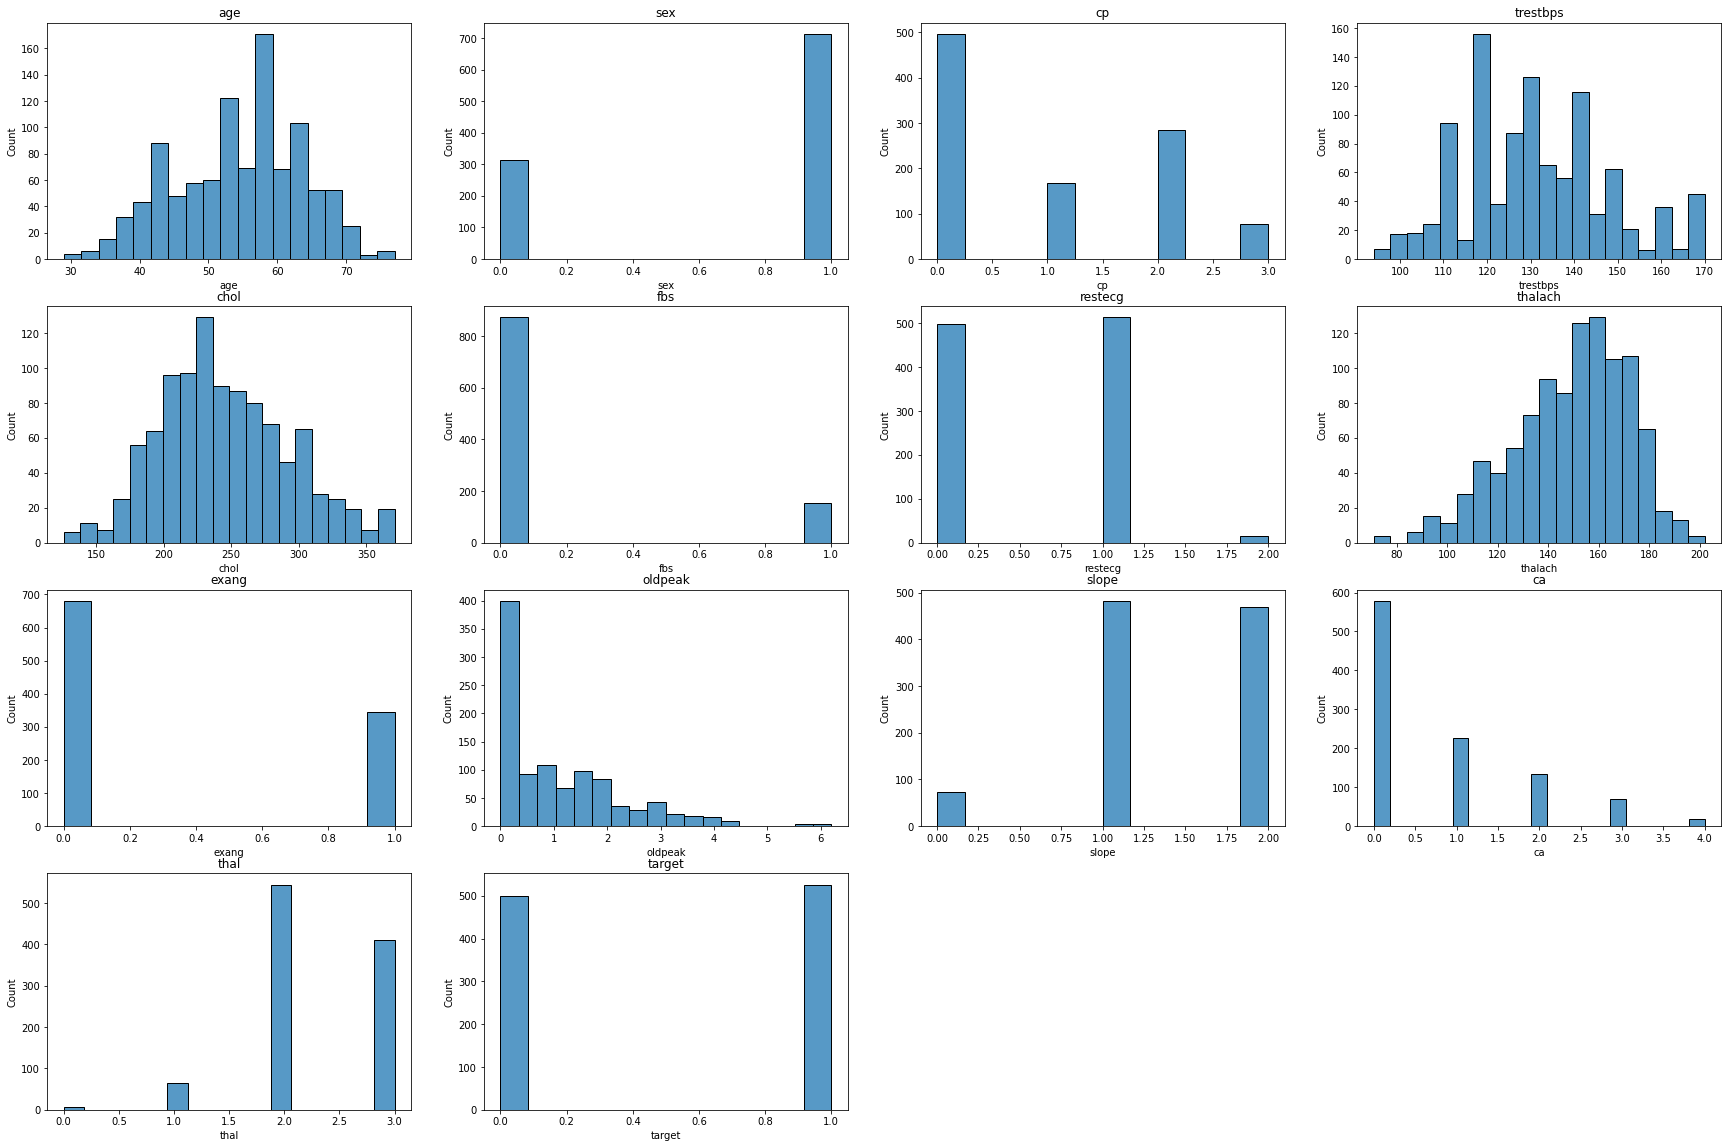

In [ ]:
plt.figure(figsize = (30, 20))

for i in range(1, len(columns)+1):

  plt.subplot(4, 4, i)

  sns.histplot(df[columns[i-1]])

  plt.title(columns[i-1])


In [ ]:
skewcol = ["age", "trestbps", "oldpeak", "thalach", "chol"]

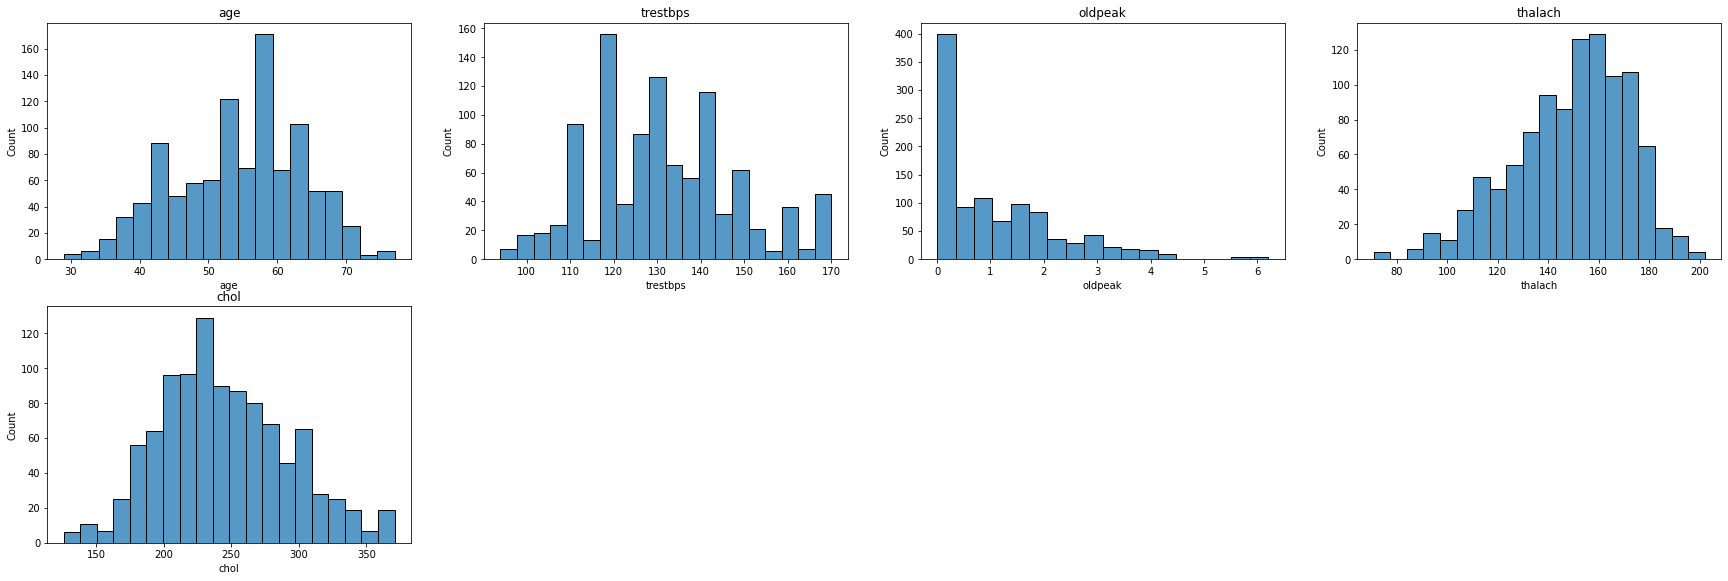

In [ ]:
plt.figure(figsize = (30, 20))

for i in range(1, len(skewcol)+1):

  plt.subplot(4, 4, i)

  sns.histplot(df[skewcol[i-1]])

  plt.title(skewcol[i-1])


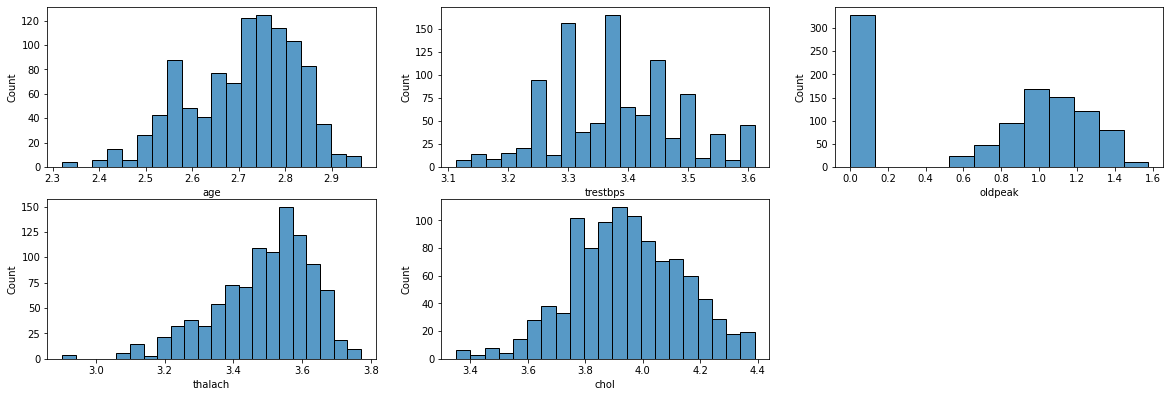

In [ ]:
plt.figure(figsize = (20, 10))
for i in range(len(skewcol)):
  plt.subplot(3, 3, i+1)
  df[skewcol[i]] = np.sqrt(df[skewcol[i]])

  sns.histplot(np.sqrt(df[skewcol[i]]))


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,7.211103,1,0,11.180340,14.560220,0,1,12.961481,0,1.000000,2,2,3,0
1,7.280110,1,0,11.832160,14.247807,1,0,12.449900,1,1.760682,0,0,3,0
2,8.366600,1,0,12.041595,13.190906,0,1,11.180340,1,1.612452,0,0,3,0
3,7.810250,1,0,12.165525,14.247807,0,1,12.688578,0,0.000000,2,1,3,0
4,7.874008,0,0,11.747340,17.146428,1,1,10.295630,0,1.378405,1,3,2,0


In [ ]:
x = df.drop("target", axis = 1)
y = df["target"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.2,  random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "liblinear", random_state = 0)

logreg.fit(xtrain, ytrain)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = logreg.predict(xtest)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.7951219512195122

In [ ]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, xtest, ytest, cv = 5, scoring = "accuracy")

array([0.7804878 , 0.7804878 , 0.82926829, 0.73170732, 0.85365854])

In [ ]:
# HyperParameter Tuning

In [ ]:
param = [{"penalty": ["l1", "l2"]},
         {"C": [1, 10, 100, 1000]}, 
         {"solver": ["liblinear", "saga", "lbfgs"]}
       ]

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(xtest, ytest)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]},
                         {'solver': ['liblinear', 'saga', 'lbfgs']}],
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.7951219512195122

In [ ]:
grid_search.best_params_

{'penalty': 'l2'}

In [ ]:
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 8, step = 1)
rfe_selector.fit(x, y)
new_x = x.columns[rfe_selector.get_support()]

In [ ]:
new_df = pd.read_csv("/content/heart.csv")
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
new_x  = list(new_x) + ["target"]
new_x


['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
new_df = new_df[new_x]
new_df.head()

,sex,cp,restecg,exang,oldpeak,slope,ca,thal,target
0,1,0,1,0,1.0,2,2,3,0
1,1,0,0,1,3.1,0,0,3,0
2,1,0,1,1,2.6,0,0,3,0
3,1,0,1,0,0.0,2,1,3,0
4,0,0,1,0,1.9,1,3,2,0


In [ ]:
x_new = new_df.drop("target", axis = 1)
y_new = new_df["target"]

In [ ]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(x_new, y_new, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

new_xtrain = scalar.fit_transform(new_xtrain)
new_xtest = scalar.transform(new_xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "liblinear", random_state = 0)

logreg.fit(new_xtrain, new_ytrain)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_new = logreg.predict(new_xtest)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.7951219512195122

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

##Decision Tree

In [ ]:
def classifier(model, x_train= xtrain, y_train = ytrain, x_test = xtest, y_test = ytest):

  model_classifier = model.fit(x_train, y_train)
  ypred = model_classifier.predict(xtest)
  return accuracy_score(ypred, y_test)

In [ ]:
classifier(DecisionTreeClassifier(), xtrain, ytrain, xtest, ytest)

0.9853658536585366

In [ ]:
classifier(RandomForestClassifier(), xtrain, ytrain, xtest, ytest)

0.9853658536585366

In [ ]:
classifier(XGBClassifier(), xtrain, ytrain, xtest, ytest)

0.9463414634146341

In [ ]:
classifier(SVC(), xtrain, ytrain, xtest, ytest)

0.8975609756097561

In [ ]:
classifier(LogisticRegression(), xtrain, ytrain, xtest, ytest)

0.7951219512195122

## Feature Selction Methods for Numerical data
1). Anova f-test

2). Mutual information Statistics

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
def anova_test(xtrain, ytrain, xtest):

  fs = SelectKBest(score_func= f_classif, k = "all")
  fs.fit(xtrain, ytrain)
  fs.transform(xtrain)
  fs.transform(xtest)

  return fs

In [ ]:
fs = anova_test(xtrain, ytrain, xtest)
anova = pd.DataFrame()

In [ ]:
anova["Feature_Name"] = x.columns
anova["Scores"] = fs.scores_

In [ ]:
index = anova.sort_values(by= "Scores", ascending = False).index[:6]

In [ ]:
list(anova["Feature_Name"][index])

['oldpeak', 'thalach', 'cp', 'exang', 'ca', 'thal']

## Visualize Importance


In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)
    


    # grouping all data and sorting in descending order
    # order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending = False).index[:500]
    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending = False).index
    
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize = (8, max(6, len(order) * 0.25)))
    sns.boxenplot(data = feature_importance_df, x = "feature_importance", y = "column", ax= ax, order = order, palette = "viridis96", orient = "h")
    ax.tick_params(axis = "x", rotation = 0)
    ax.set_title("Grid")
    ax.grid()
    fig.tight_layout()
    
    
    
    return fig, ax


CPU times: user 73.7 ms, sys: 1.68 ms, total: 75.4 ms
Wall time: 75 ms


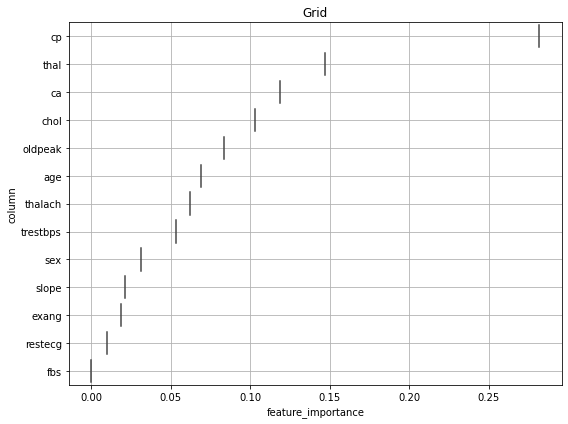

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
rf= DecisionTreeClassifier()

# Fit the model to the data
rf.fit(xtrain, ytrain)

# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, x)

In [ ]:
rf.feature_importances_

array([0.07629662, 0.02643406, 0.27452362, 0.05820146, 0.10143862,
       0.        , 0.        , 0.05796592, 0.01886571, 0.09011718,
       0.0301151 , 0.11890111, 0.14714059])